In [9]:
df = pd.read_csv("/content/data.csv")


for col in ['id', 'Unnamed: 32']:
    if col in df.columns:
        df = df.drop(col, axis=1)

df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

print("Missing values after dropping columns:\n", df.isnull().sum())
print("Shape:", df.shape)


Missing values after dropping columns:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Shape: (569, 31)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/data.csv")

for col in ['id', 'Unnamed: 32']:
    if col in df.columns:
        df = df.drop(col, axis=1)


df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

print("Missing values per column:\n", df.isnull().sum())
print("Dataset shape:", df.shape)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ada = AdaBoostClassifier(n_estimators=100, random_state=42)
logreg = LogisticRegression(max_iter=1000, random_state=42)


ada.fit(X_train, y_train)
logreg.fit(X_train_scaled, y_train)


ada_pred = ada.predict(X_test)
logreg_pred = logreg.predict(X_test_scaled)

print("=== AdaBoost Performance ===")
print(f"Accuracy: {accuracy_score(y_test, ada_pred):.4f}")
print(classification_report(y_test, ada_pred))

print("=== Logistic Regression Performance ===")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred):.4f}")
print(classification_report(y_test, logreg_pred))




Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Dataset shape: (569, 31)
=== AdaBoost Performance ===
Accura

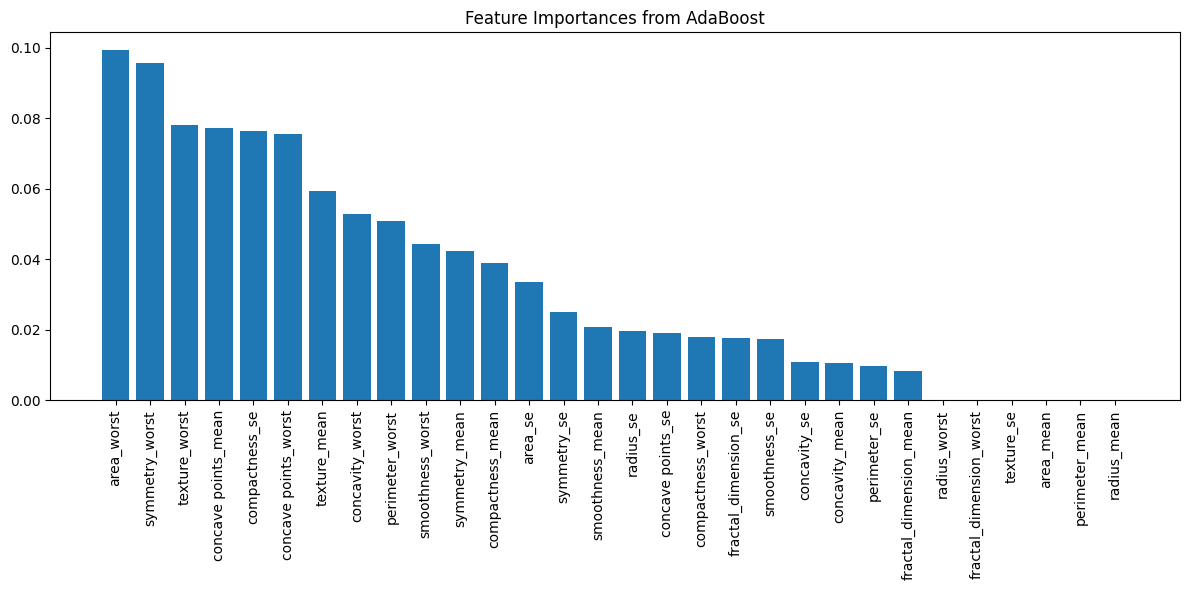

In [11]:

importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances from AdaBoost")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/data.csv')


df = df.drop(columns=['id'], errors='ignore')
df = df.dropna(axis=1)


df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_preds))


Logistic Regression Accuracy: 0.9736842105263158
AdaBoost Accuracy: 0.9649122807017544
